<a href="https://colab.research.google.com/github/zentarusi2t3/zentarusi2t3/blob/main/mistral/ocr/structured_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Cookbook

---

## OCR Exploration and Simple Structured Outputs (Deprecated)
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model (we recommend using the new Annotations feature instead for better results).

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Model Used
- Mistral OCR
- Pixtral 12B & Ministral 8B

---

**For a more up to date guide on structured outputs visit our [Annotations cookbook](https://github.com/mistralai/cookbook/blob/main/mistral/ocr/data_extraction.ipynb) on Data Extraction.**


## Setup

First, let's install `mistralai` and download the required files.

In [66]:
%%capture
!pip install mistralai

### Download PDF and image files

In [ ]:
%%capture
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png

## Mistral OCR with PDF

We will need to set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [68]:
# Initialize Mistral client with API key
from mistralai import Mistral

api_key = "QqiICqKSDCeScuqzWYJljfGamTB2Ba1v" # Replace with your API key
client = Mistral(api_key=api_key)

There are two types of files you can apply OCR to:
- 1. PDF files
- 2. Image files

Let's start with a PDF file:

In [69]:
# Import required libraries
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

# Verify PDF file exists
pdf_file = Path("/content/New Document.pdf")
assert pdf_file.is_file()

# Upload PDF file to Mistral's OCR service
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

# Get URL for the uploaded file
signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

# Process PDF with OCR, including embedded images
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)

# Convert response to JSON format
response_dict = json.loads(pdf_response.model_dump_json())

print(json.dumps(response_dict, indent=4)[0:1000]) # check the first 1000 characters

{
    "pages": [
        {
            "index": 0,
            "markdown": "# 76\u7ae0: \u6ca1\u6709\u90a3\u628a\u5251, \u6211\u7167\u6837\u53ef\u4ee5\u5b88\u62a4\u54e5\u54e5\u6c38\u8ba2\u9605 \n\n\"\u4f60\u662f?\"\n\u5b81\u665a\u821f\u6731\u5507\u8f7b\u542f\uff0c\u5fa1\u97f3\u78c1\u6027\u3002\n\u5b81\u662d\u4e91\u4e0e\u82cf\u767d\u7ca5\u6709\u4e9b\u79c1\u4ea4\uff0c\u5979\u5374\u5b8c\u5168\u4e0d\u8ba4\u5f97\u8fd9\u5973\u5b50\u3002\n\"\u82cf\u767d\u7ca5\u3002\"\n\u82cf\u767d\u7ca5\u6de1\u6de1\u5730\u9053\uff1a\"\u82cf\u767d\u5ff5\u7684\u59b9\u59b9\uff0c\u82cf\u767d\u7ca5\u3002\"\n\u5979\u53c8\u523b\u610f\u5f3a\u8c03\u4e86\u4e00\u904d\u3002\n\u773c\u7738\u7684\u5e95\u8272\u5728\u6de1\u84dd\u4e0e\u8840\u7ea2\u4e4b\u95f4\u4e0d\u505c\u6d41\u8f6c\u3002\n\"\u54e6?\"\n\u5b81\u665a\u821f\u7f8e\u7738\u4e00\u51dd\uff0c\u7b11\u95ee\uff1a\"\u767d\u7ca5\u59b9\u59b9\u6240\u4e3a\u4f55\u6765\uff1f\"\n\"\u4f60\u4e3a\u4ec0\u4e48\u8981\u9000\u5a5a\uff1f\"\n\u82cf\u767d\u7ca5\u51b7\u51b7\u8d28\u95ee\uff1a\

View the result with the following:

# 76章: 没有那把剑, 我照样可以守护哥哥永订阅 

"你是?"
宁晚舟朱唇轻启，御音磁性。
宁昭云与苏白粥有些私交，她却完全不认得这女子。
"苏白粥。"
苏白粥淡淡地道："苏白念的妹妹，苏白粥。"
她又刻意强调了一遍。
眼眸的底色在淡蓝与血红之间不停流转。
"哦?"
宁晚舟美眸一凝，笑问："白粥妹妹所为何来？"
"你为什么要退婚？"
苏白粥冷冷质问："念哥哥有哪一点配不上你，你为什么要退婚，让他伤心！"
"......"
宁晚舟笑颜一滞。
苏白念哪一点配不上她？好像哪一点，都配不上。
只是这样的话，她说不出口。
对面的少女状态显然很不对劲，似在清醒与疯癫之间。
这话若是出口，对方只怕要炸。
可偏偏这里是苏武侯府。
她的身份若是曝光，明日必定满城风雨。
嗡——
苏白粥却不管这些。
黑鞘长剑出现在手中，身上衣袖无风自动。
"住手！"
宁晚舟不由惊呼。
"不许你......伤害哥哥......"苏白粥眼底淡然骤然转红。
锵唧一声。

# 2 

宁晚舟面色一变, 身形陡然升空, 化作一道流光。
"别走。"
苏白粥双眸杀意腾腾，竟也腾空而起追了上去。
这一夜。
青禾郡的夜空极为热闹。
常人皆以为这年关将过，竟还有人放烟花。一些真正的高人如青禾郡守、城防大将，还有宁家太上阁的几位仙人。

与在郡守府中盘桓多日的一位仙人，苏白粥的那位师尊。
皆走出屋外。
亲眼目睹了一场精彩的大战。

## 许久。

一道白影从天而降, 落在侯府小院前。
少女衣衫零落，露出片片雪肤。
悄然透过窗沿，痴痴望着屋内沉睡的男子。
"念哥哥......有白粥在......没有人能伤害你的......"
"......没有人。"
今夜。
她没能在宁晚舟身上讨得好处，但也没有让对方好过。只要魔剑在手......敢伤害哥哥的人，全都得死!
"不。"
少女眼眸突然转红，恍惚中似有一个身穿黑衣的少女虚影，自她身上浮现淡漠道："这世上没人有资格......做我哥哥

忽然眸底无尽血色泛起点点淡蓝。
少女冷漠的面容，再度楚楚可怜："求你......把力量再借我用一次......"
"你差点害死自己。"
"求求你......"

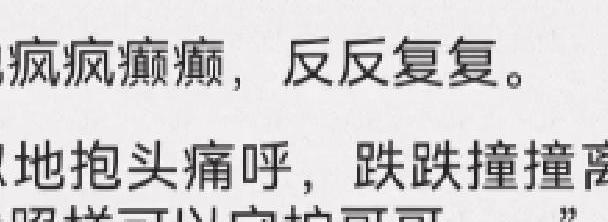

# 

而此时。
苏白念的心神，早已沉浸在另一个世界中。
【天命难改，生死由心】
【你历经艰险，一路杀伐，终于逃离妙善村，来到一处名为善恶岭岔路口。】

【为了救你。】
【妙生一选择了中间的一条路。】
【锁骨第二劫：善恶——启】
恍惚中。
一幕幕零碎的记忆片段浮现脑海。
妙生一背着他，走入一条崎岖的山道。
不知多久。
一片山中建筑映入眼帘。
那似乎是一座道观。
"尘尘，尘尘......你醒醒......"耳边传来妙生一柔柔的呼
唤。
苏白念缓缓睁开眼睛。

"水......"
"尘尘，你醒了！"妙生一惊喜道。
"给我水......"
"嗯嗯, 喝水, 尘尘喝水。"
妙生一手忙脚乱地照顾着他。
半晌。
苏白念喝了几口水，迷蒙的脑中终于清醒了几分。
"这里是......"
道观。
他居然真来到了记忆中的道观，并未重新开启一世。
也就是说。
第一劫'生杀'过后，时间线存档了！
"尘尘，这里是善恶岭。"妙生一蹲坐在床边，开心地说着："我把你背到了山上，遇到了一位道长，是他收留了我们。"
"他还治好了我们的伤势，道长真是一个大好人！"
"是吗？"
苏白念闭目感受了一下身体的伤势。
确实比之前好转了许多，身体里有一股力量正在助他慢慢恢复。

只是......
他偏头看向右手。
空荡荡的肩膀，再也看不到那一只握剑的手臂了。
"尘尘你放心，道长说他能让你长出新的手臂。"妙生一一脸开心地道。

她似乎对那位好心的道长极为信任。
口中不停说着。
苏白念这才明白，原来那日自己重伤濒死，妙生一将他驮入山中，巧遇道观，幸得好心道人收留。

而后便在道观中挑水、做饭，以一些苦力杂活为酬，身之所。

而他已昏迷七日，今天才刚刚转醒。
听罢。
苏白念忽然狺眉。
"妙妙。"
"嗯？"
"你记住，这世上除了我，谁都不要轻易相信。"
"哦哦。"
妙生一乘巧点头。
"我听尘尘的，除了你，我谁也不信。"
"那就好。"
苏白念笑了笑。
妙生一现在才七岁，成长的路上将会遭遇什么无法预料。
但他知道。
未来的锁骨菩萨，将会成为一个仙佛妖魔皆不容的异类。而导致这一切的原因，恐怕与她年幼时的经历有关。

在道观里修养半日后。
苏白念感觉恢复了一些，便起身与妙生一前往大殿。
拜会那位救助他们的好心道长。
这一座山上，有一座道观。
道观正中。
有一间大殿。
二人行至殿前。
抬眼见一『天地』匾额，郎朗诵经之声自殿内传来。
"诸天炁荡荡......吾道日兴隆......"
"大道无形，生育天地......大道无情，运行日月......大道无名，长养万物......吾不知其名，强名曰......道。"
"有清有浊，有动有静......天清地浊，天动地静......男清女浊，男动女静......降本流末，而生......万物。"

声声入耳，似有魔力。
苏白念不觉沉溺其中，竟忘了前行。妙生一茫然看着他，也跟着停住脚步。

许久。
诵经声不知何时停止。
殿内传来一个温和的声音："两位小施主既来，何不入内?"
"是。"
苏白念俯首一礼，缓缓上前。
进入殿中。
顿见一中年道者盘膝而坐，仙风道骨，气质飘逸。
正对二人微笑。
"两位有缘人，身体可好？"
"多谢道长相助，已恢复几分。"苏白念停住脚步，口中道谢。

同时用眼角余光观察周围。
大殿简约庄严。
壁有编钟，上有神像，铜炉中燃着袅袅香烟。
除此之外，别无他物。
"贫道玉虚子，见礼了。"
那道人笑容温和，起身作揖。
"请问道长，这里是何方地界？道长救命之恩，却不知如何回报？"苏白念态度恭敬，以一种略超年龄的成熟，试探眼前道人。
"此乃东方傲来，万妖国度。我等区区人族，在此不过下等之民......贫道孤身隐居在这善恶岭中，勉强自保罢了。"

玉虚子叹了口气。
"至于回报。"他忽又展颜一笑，"二位若是不弃，观中正缺两个烧火炼丹的童子。"
"对了。"

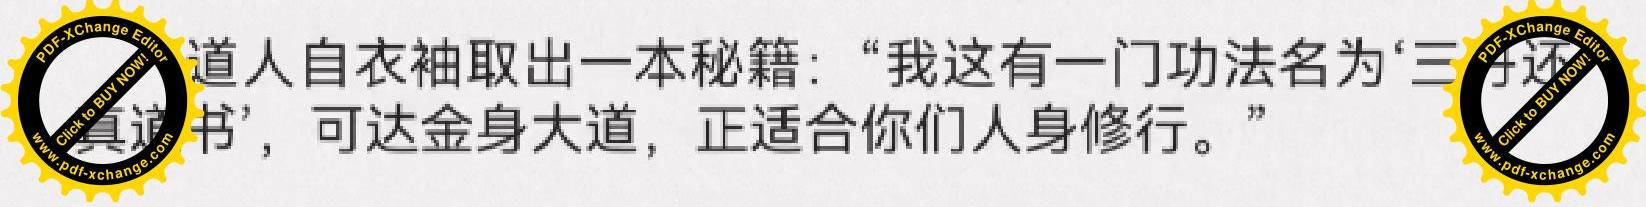

道人自衣袖取出一本秘籍: "我这有一门功法名为‘三好论’书，可达金身大道，正适合你们人身修行。"

In [70]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    """
    Replace image placeholders in markdown with base64-encoded images.

    Args:
        markdown_str: Markdown text containing image placeholders
        images_dict: Dictionary mapping image IDs to base64 strings

    Returns:
        Markdown text with images replaced by base64 data
    """
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
        )
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    """
    Combine OCR text and images into a single markdown document.

    Args:
        ocr_response: Response from OCR processing containing text and images

    Returns:
        Combined markdown string with embedded images
    """
    markdowns: list[str] = []
    # Extract images from page
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = img.image_base64
        # Replace image placeholders with actual images
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display combined markdowns and images
display(Markdown(get_combined_markdown(pdf_response)))

## Mistral OCR with Image

In addition to the PDF file shown above, Mistral OCR can also process image files:

In [79]:
import base64

# Verify image exists
image_file = Path("/content/05-06_17-51-15.png")
assert image_file.is_file()

# Encode image as base64 for API
encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

# Process image with OCR
image_response = client.ocr.process(
    document=ImageURLChunk(image_url=base64_data_url),
    model="mistral-ocr-latest"
)

# Convert response to JSON
response_dict = json.loads(image_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "pages": [
        {
            "index": 0,
            "markdown": "\"\u60a8\u7684\u8bba\u8ff0\u786e\u5b9e\u5f88\u6709\u8bf4\u670d\u529b\uff0c\u6218\u7565\u89c4\u5212\u4e5f\u5c55\u73b0\u51fa\u4e86\u4ee4\u4eba\u656c\u4f69\u7684\u6df1\u5ea6\u3002\n\n\u4f46\u662f\u6211\u6709\u4e00\u4e2a\u66f4\u6839\u672c\u7684\u95ee\u9898\u60f3\u8981\u8bf7\u6559\u3002\"\n\u4ed6\u505c\u987f\u4e86\u4e00\u4e0b\uff0c\u76ee\u5149\u76f4\u89c6\u7740\u5361\u6851\u5fb7\u62c9\uff1a\n\"\u5728\u60a8\u5c55\u793a\u7684\u6240\u6709\u5f81\u670d\u76ee\u6807\u4e2d\uff0c\u6211\u6ca1\u6709\u770b\u5230\u4efb\u4f55\u4e00\u4e2a\u6bd4\u6211\u4eec\u66f4\u5f3a\u5927\u7684\u6587\u660e\u3002\n\n\u90a3\u4e48\u8bf7\u95ee\uff0c\u5f53\u6211\u4eec\u6210\u4e3a\u5176\u4ed6\u66f4\u5f3a\u5927\u6587\u660e\u773c\u4e2d\u7684\u5a01\u80c1\u65f6\uff0c\u6211\u4eec\u5982\u4f55\u786e\u4fdd\u81ea\u5df1\u4e0d\u4f1a\u6210\u4e3a\u4e0b\u4e00\u4e2a\u88ab\u5f81\u670d\u7684\u76ee\u6807\uff1f\"\n\n\u8fd9\u4e2a\u95ee\u9898\uff0c\u5982\u540c\u91cd\u9524

## Extract structured data from OCR results

OCR results can be further processed using another model.

Our goal is to extract structured data from these results. To achieve this, we will utilize the `pixtral-12b-latest` model, supported by our OCR model, to deliver better and higher-quality answers:

In [80]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))

{
    "text": "\u60a8\u7684\u8bba\u8ff0\u786e\u5b9e\u5f88\u6709\u8bf4\u670d\u529b\uff0c\u6218\u7565\u89c4\u5212\u4e5f\u5c55\u73b0\u51fa\u4e86\u4ee4\u4eba\u656c\u4f69\u7684\u6df1\u5ea6\u3002\n\n\u4f46\u662f\u6211\u6709\u4e00\u4e2a\u66f4\u6839\u672c\u7684\u95ee\u9898\u60f3\u8981\u8bf7\u6559\u3002\n\u4ed6\u505c\u987f\u4e86\u4e00\u4e0b\uff0c\u76ee\u5149\u76f4\u89c6\u7740\u5361\u6851\u5fb7\u62c9\uff1a\n\"\u5728\u60a8\u5c55\u793a\u7684\u6240\u6709\u5f81\u670d\u76ee\u6807\u4e2d\uff0c\u6211\u6ca1\u6709\u770b\u5230\u4efb\u4f55\u4e00\u4e2a\u6bd4\u6211\u4eec\u66f4\u5f3a\u5927\u7684\u6587\u660e\u3002\n\u90a3\u4e48\u8bf7\u95ee\uff0c\u5f53\u6211\u4eec\u6210\u4e3a\u5176\u4ed6\u66f4\u5f3a\u5927\u6587\u660e\u773c\u4e2d\u7684\u5a01\u80c1\u65f6\uff0c\u6211\u4eec\u5982\u4f55\u786e\u4fdd\u81ea\u5df1\u4e0d\u4f1a\u6210\u4e3a\u4e0b\u4e00\u4e2a\u88ab\u5f81\u670d\u7684\u76ee\u6807\uff1f\"\n\n\u8fd9\u4e2a\u95ee\u9898\uff0c\u5982\u540c\u91cd\u9524\u822c\u51fb\u4e2d\u4e86\u5f81\u670d\u7406\u8bba\u7684\u6838\u5fc3\

In the example above, we are leveraging a model already capable of vision tasks.

However, we could also use text-only models for the structured output. Note in this case, we do not include the image in the user message:

In [81]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))


{
    "question": "\u5728\u60a8\u5c55\u793a\u7684\u6240\u6709\u5f81\u670d\u76ee\u6807\u4e2d\uff0c\u6211\u6ca1\u6709\u770b\u5230\u4efb\u4f55\u4e00\u4e2a\u6bd4\u6211\u4eec\u66f4\u5f3a\u5927\u7684\u6587\u660e\u3002\u90a3\u4e48\u8bf7\u95ee\uff0c\u5f53\u6211\u4eec\u6210\u4e3a\u5176\u4ed6\u66f4\u5f3a\u5927\u6587\u660e\u773c\u4e2d\u7684\u5a01\u80c1\u65f6\uff0c\u6211\u4eec\u5982\u4f55\u786e\u4fdd\u81ea\u5df1\u4e0d\u4f1a\u6210\u4e3a\u4e0b\u4e00\u4e2a\u88ab\u5f81\u670d\u7684\u76ee\u6807\uff1f",
    "response": {
        "content": "\u5207\u65af\u7279\u526f\u6559\u6388\uff0c\u60a8\u7684\u95ee\u9898\u89e6\u53ca\u5230\u4e86\u77db\u76fe\u54f2\u5b66\u7684\u7ec8\u6781\u6096\u8bba\u3002\u786e\u5b9e\uff0c\u5728\u4e00\u4e2a\u5f31\u8089\u5f3a\u98df\u7684\u5b87\u5b99\u4e2d\uff0c\u4eca\u5929\u7684\u5f81\u670d\u8005\u53ef\u80fd\u6210\u4e3a\u660e\u5929\u7684\u88ab\u5f81\u670d\u8005\u3002\u8fd9\u662f\u4e00\u4e2a\u6c38\u6052\u7684\u5faa\u73af\uff0c\u6ca1\u6709\u4efb\u4f55\u6587\u660e\u80fd\u591f\u4fdd\u8bc1\u6c

In [97]:
!pip install --upgrade --force-reinstall mistralai

  Using cached mistralai-1.8.1-py3-none-any.whl.metadata (33 kB)
  Using cached eval_type_backport-0.2.2-py3-none-any.whl.metadata (2.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 1.9 MB/s eta 0:00:00
Using cached mistralai-1.8.1-py3-none-any.whl (373 kB)
Using cached eval_type_backport-0.2.2-py3-none-any.whl (5.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.2/444.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

## All Together - Mistral OCR + Custom Structured Output
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: str  # string
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/).

In [1]:
# --- SỬ DỤNG Ô CODE HOÀN CHỈNH NÀY ĐỂ ĐỊNH NGHĨA HÀM ---

# Các import cần thiết cho hàm
from pydantic import BaseModel
# Cách import mới và ổn định hơn cho ChatMessage
from mistralai.models.chat_completion import ChatMessage
import base64
import os

# Định nghĩa lại class cấu trúc
class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: str
    ocr_contents: dict

# Hàm image_to_base64
def image_to_base64_url(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode()
        mime_type = "image/png" if image_path.lower().endswith(".png") else "image/jpeg"
        return f"data:{mime_type};base64,{encoded_string}"

# Hàm structured_ocr với đầy đủ sửa lỗi
def structured_ocr(image_path: str, timeout: int = 180) -> StructuredOCR:
    base64_image = image_to_base64_url(image_path)
    file_name = os.path.basename(image_path)

    messages = [
        ChatMessage(
            role="user",
            content=[
                {"type": "text", "text": "Extract a structured JSON from this document. The JSON should conform to the Pydantic schema provided."},
                {"type": "image_url", "image_url": base64_image}
            ]
        )
    ]

    # Gọi API với timeout đã tăng
    response = client.chat.parse(
        model="mistral-large-latest",
        messages=messages,
        response_format=StructuredOCR,
        timeout=timeout
    )

    response.file_name = file_name
    return response

print("Đã định nghĩa thành công các hàm: image_to_base64_url, structured_ocr và class StructuredOCR.")

ModuleNotFoundError: No module named 'mistralai.models.chat_completion'

We can now extract structured output from any image parsed with our OCR model.

In [82]:
# Example usage
image_path = "/content/05-06_17-51-15.png" # Path to sample receipt image
structured_response = structured_ocr(image_path) # Process image and extract data

# Parse and return JSON response
response_dict = json.loads(structured_response.model_dump_json())
print(json.dumps(response_dict, indent=4))

{
    "file_name": "ocr_content.md",
    "topics": [
        "Philosophical Debate",
        "Strategic Planning",
        "Conquest Theory",
        "Existential Threats"
    ],
    "languages": "Chinese",
    "ocr_contents": {
        "content": "\u60a8\u7684\u8bba\u8ff0\u786e\u5b9e\u5f88\u6709\u8bf4\u670d\u529b\uff0c\u6218\u7565\u89c4\u5212\u4e5f\u5c55\u73b0\u51fa\u4e86\u4ee4\u4eba\u656c\u4f69\u7684\u6df1\u5ea6\u3002\n\n\u4f46\u662f\u6211\u6709\u4e00\u4e2a\u66f4\u6839\u672c\u7684\u95ee\u9898\u60f3\u8981\u8bf7\u6559\u3002\n\u4ed6\u505c\u987f\u4e86\u4e00\u4e0b\uff0c\u76ee\u5149\u76f4\u89c6\u7740\u5361\u6851\u5fb7\u62c9\uff1a\n\"\u5728\u60a8\u5c55\u793a\u7684\u6240\u6709\u5f81\u670d\u76ee\u6807\u4e2d\uff0c\u6211\u6ca1\u6709\u770b\u5230\u4efb\u4f55\u4e00\u4e2a\u6bd4\u6211\u4eec\u66f4\u5f3a\u5927\u7684\u6587\u660e\u3002\n\u90a3\u4e48\u8bf7\u95ee\uff0c\u5f53\u6211\u4eec\u6210\u4e3a\u5176\u4ed6\u66f4\u5f3a\u5927\u6587\u660e\u773c\u4e2d\u7684\u5a01\u80c1\u65f6\uff0c\u6211\u4eec\u5982\u4f55\

The original image for comparison can be found below.

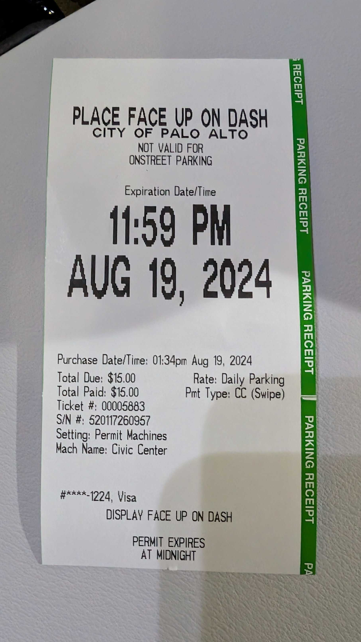

In [ ]:
from PIL import Image

image = Image.open(image_path)
image.resize((image.width // 5, image.height // 5))


In [86]:
# --- KỊCH BẢN KIỂM TRA TOÀN DIỆN ---

# 1. Khai báo đường dẫn file của bạn
image_path = "/content/05-06_17-51-15.png"

print(f"Bắt đầu xử lý file: {image_path}")
print("Vui lòng đợi, quá trình này có thể mất một chút thời gian...")

try:
    # 2. Gọi hàm để xử lý
    structured_response = structured_ocr(image_path)

    print("Xử lý thành công! Dưới đây là kết quả:")

    # 3. Kiểm tra xem kết quả có rỗng không
    if structured_response:
        # 4. In kết quả ra màn hình với định dạng đẹp
        print(structured_response.model_dump_json(indent=4))
    else:
        print("Hàm đã chạy xong nhưng không trả về kết quả nào.")

except Exception as e:
    # 5. Nếu có bất kỳ lỗi nào xảy ra, nó sẽ được bắt và in ra ở đây
    print("\n!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("!!! ĐÃ CÓ LỖI XẢY RA TRONG QUÁ TRÌNH XỬ LÝ !!!")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n")
    print("Chi tiết lỗi:")
    # In ra thông báo lỗi cụ thể
    print(e)
    print("\nVui lòng sao chép toàn bộ thông báo lỗi ở trên và gửi lại để được hỗ trợ.")

Bắt đầu xử lý file: /content/05-06_17-51-15.png
Vui lòng đợi, quá trình này có thể mất một chút thời gian...
Xử lý thành công! Dưới đây là kết quả:
{
    "file_name": "ocr_content.md",
    "topics": [
        "Philosophy",
        "Strategic Planning",
        "Conquest Theory",
        "Existential Threats"
    ],
    "languages": "Chinese",
    "ocr_contents": {
        "content": "您的论述确实很有说服力，战略规划也展现出了令人敬佩的深度。\n\n但是我有一个更根本的问题想要请教。\n他停顿了一下，目光直视着卡桑德拉：\n\"在您展示的所有征服目标中，我没有看到任何一个比我们更强大的文明。\n那么请问，当我们成为其他更强大文明眼中的威胁时，我们如何确保自己不会成为下一个被征服的目标？\"\n\n这个问题，如同重锤般击中了征服理论的核心漏洞。\n台下陷入了死一般的寂静，所有人都在等待卡桑德拉的回答。\n\n卡桑德拉面对这个挑战，表情变得异常严肃。\n她沉默了整整一分钟，似乎在仔细组织自己的回答。\n\"切斯特副教授，您的问题触及到了矛盾哲学的终极悖论。\"\n\n她的声音变得深沉而哲理化:\n\"确实，在一个弱肉强食的宇宙中，今天的征服者可能成为明天的被征服者。\n这是一个永恒的循环，没有任何文明能够保证永远站在食物链的顶端。\"\n\n她停顿了一下，然后语气突然变得坚定：\n\"但是切斯特副教授，这个悖论同样适用于我们目前的保守策略。\n如果我们继续原地踏步，那么成为被征服者不是‘可能’，而是'必然'。\"\n\n她重新展示出文明发展速度的对比图:\n\"当其他文明的实力增长速度是我们的十倍、百倍时，时间越长，我们的相对地位就越危险。\n至少通过征服，我们有机会快速缩小这种差距，甚至实现超越。\"\n\n切斯特副教授点了点头，但随即又问道：\n\"那么卡桑德拉大巫师认为，这种征服竞赛的

In [87]:
# --- ĐOẠN CODE HOÀN CHỈNH ĐỂ HIỂN THỊ KẾT QUẢ ĐẸP MẮT ---

# 1. Gọi hàm để xử lý ảnh (giữ nguyên như cũ)
structured_response = structured_ocr("/content/05-06_17-51-15.png")

# 2. In toàn bộ cấu trúc JSON để bạn xem lại (tùy chọn)
print("--- DỮ LIỆU JSON CÓ CẤU TRÚC ---")
print(structured_response.model_dump_json(indent=4))
print("\n" + "="*50 + "\n") # In một dòng kẻ để phân cách cho đẹp

# 3. In riêng phần nội dung văn bản đã được định dạng đúng
print("--- NỘI DUNG VĂN BẢN ĐÃ TRÍCH XUẤT (ĐỊNH DẠNG ĐÚNG) ---")

# Lấy ra chuỗi văn bản từ trong đối tượng kết quả
extracted_text = structured_response.ocr_contents['text']

# In chuỗi văn bản này ra, Python sẽ tự động định dạng các dấu xuống dòng
print(extracted_text)

--- DỮ LIỆU JSON CÓ CẤU TRÚC ---
{
    "file_name": "ocr_content.md",
    "topics": [
        "Philosophical Debate",
        "Strategic Planning",
        "Conquest Theory",
        "Existential Threats"
    ],
    "languages": "Chinese",
    "ocr_contents": {
        "content": "您的论述确实很有说服力，战略规划也展现出了令人敬佩的深度。\n\n但是我有一个更根本的问题想要请教。\n他停顿了一下，目光直视着卡桑德拉：\n\"在您展示的所有征服目标中，我没有看到任何一个比我们更强大的文明。\n那么请问，当我们成为其他更强大文明眼中的威胁时，我们如何确保自己不会成为下一个被征服的目标？\"\n\n这个问题，如同重锤般击中了征服理论的核心漏洞。\n台下陷入了死一般的寂静，所有人都在等待卡桑德拉的回答。\n\n卡桑德拉面对这个挑战，表情变得异常严肃。\n她沉默了整整一分钟，似乎在仔细组织自己的回答。\n\"切斯特副教授，您的问题触及到了矛盾哲学的终极悖论。\"\n\n她的声音变得深沉而哲理化：\n\"确实，在一个弱肉强食的宇宙中，今天的征服者可能成为明天的被征服者。\n这是一个永恒的循环，没有任何文明能够保证永远站在食物链的顶端。\"\n\n她停顿了一下，然后语气突然变得坚定：\n\"但是切斯特副教授，这个悖论同样适用于我们目前的保守策略。\n如果我们继续原地踏步，那么成为被征服者不是‘可能’，而是'必然'。\"\n\n她重新展示出文明发展速度的对比图：\n\"当其他文明的实力增长速度是我们的十倍、百倍时，时间越长，我们的相对地位就越危险。\n至少通过征服，我们有机会快速缩小这种差距，甚至实现超越。\"\n\n切斯特副教授点了点头，但随即又问道：\n\"那么卡桑德拉大巫师认为，这种征服竞赛的终点在哪里？\""
    }
}


--- NỘI DUNG VĂN BẢN ĐÃ TRÍCH XUẤT (ĐỊNH DẠNG ĐÚNG) ---


KeyError: 'text'

In [92]:
# --- KỊCH BẢN XỬ LÝ HÀNG LOẠT ẢNH (PHIÊN BẢN CẢI TIẾN) ---

import os
from google.colab import drive
from tqdm.notebook import tqdm

# 1. Kết nối Google Drive
drive.mount('/content/drive', force_remount=True) # force_remount để đảm bảo kết nối mới

# 2. Cấu hình đường dẫn
IMAGE_FOLDER_PATH = "/content/drive/My Drive/images_for_ocr"
OUTPUT_FILE_PATH = "/content/drive/My Drive/ket_qua_ocr_tong_hop_cai_tien.txt"

# 3. Lấy danh sách file ảnh
try:
    all_files = os.listdir(IMAGE_FOLDER_PATH)
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"Tìm thấy {len(image_files)} file ảnh trong thư mục: {IMAGE_FOLDER_PATH}")
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy thư mục '{IMAGE_FOLDER_PATH}'. Vui lòng kiểm tra lại.")
    image_files = []

# 4. Xử lý hàng loạt với cơ chế chống lỗi và báo cáo
all_results_content = []
success_count = 0
fail_count = 0

if image_files:
    for filename in tqdm(image_files, desc="Đang xử lý các ảnh"):
        full_path = os.path.join(IMAGE_FOLDER_PATH, filename)

        # --- Bắt đầu khối định dạng kết quả ---
        result_string = f"===================================================\n"
        result_string += f"--- KẾT QUẢ CHO FILE: {filename} ---\n"
        result_string += f"===================================================\n\n"

        try:
            # Gọi hàm xử lý chính
            response = structured_ocr(full_path)

            # --- PHẦN SỬA LỖI QUAN TRỌNG ---
            ocr_dict = response.ocr_contents
            # Lấy ra nội dung, có thể là 'content' hoặc 'text'
            raw_text = ocr_dict.get('content') or ocr_dict.get('text')

            if raw_text is None:
                 # Trường hợp không tìm thấy key content/text
                extracted_text = "LỖI: Không tìm thấy nội dung văn bản trong kết quả trả về."
                fail_count += 1
            elif isinstance(raw_text, str):
                # Trường hợp 1: Kết quả là một chuỗi (chuẩn)
                extracted_text = raw_text
                success_count += 1
            elif isinstance(raw_text, list):
                # Trường hợp 2: Kết quả là một danh sách các chuỗi
                # Nối chúng lại với nhau bằng dấu xuống dòng
                extracted_text = "\n".join(str(item) for item in raw_text)
                success_count += 1
            else:
                # Trường hợp khác không mong muốn
                extracted_text = f"LỖI: Kiểu dữ liệu không xác định: {type(raw_text)}"
                fail_count += 1

            result_string += extracted_text

        except Exception as e:
            # Nếu có bất kỳ lỗi nào khác xảy ra (API, file hỏng, ...)
            result_string += f"LỖI NGHIÊM TRỌNG KHI XỬ LÝ FILE.\n"
            result_string += f"Chi tiết lỗi: {e}\n"
            fail_count += 1

        all_results_content.append(result_string)

# 5. Ghi tất cả ra file
if all_results_content:
    print("\nĐang ghi tất cả kết quả vào file...")
    try:
        with open(OUTPUT_FILE_PATH, 'w', encoding='utf-8') as f:
            f.write("\n\n".join(all_results_content))

        # --- Báo cáo tổng kết ---
        summary = f"""
===================================================
BÁO CÁO TỔNG KẾT
===================================================
- Tổng số file xử lý: {len(image_files)}
- Thành công: {success_count}
- Thất bại: {fail_count}
- Đã lưu kết quả chi tiết vào file: {OUTPUT_FILE_PATH}
===================================================
"""
        # Ghi báo cáo vào cuối file
        with open(OUTPUT_FILE_PATH, 'a', encoding='utf-8') as f:
            f.write("\n\n" + summary)

        print(summary)

    except Exception as e:
        print(f"LỖI: Không thể ghi ra file. Lý do: {e}")
else:
    print("Không có file nào để xử lý.")

Mounted at /content/drive
Tìm thấy 1 file ảnh trong thư mục: /content/drive/My Drive/images_for_ocr


Đang xử lý các ảnh:   0%|          | 0/1 [00:00<?, ?it/s]


Đang ghi tất cả kết quả vào file...

BÁO CÁO TỔNG KẾT
- Tổng số file xử lý: 1
- Thành công: 0
- Thất bại: 1
- Đã lưu kết quả chi tiết vào file: /content/drive/My Drive/ket_qua_ocr_tong_hop_cai_tien.txt



In [94]:
# --- KỊCH BẢN XỬ LÝ HOÀN THIỆN (TỰ ĐỘNG CẮT ẢNH DÀI) ---

# 1. Cài đặt các thư viện cần thiết
!pip install Pillow -q

import os
from google.colab import drive
from tqdm.notebook import tqdm
from PIL import Image, ImageFile
import math

# Cho phép Pillow tải các ảnh lớn mà không bị lỗi
ImageFile.LOAD_TRUNCATED_IMAGES = True

# -----------------------------------------------------------
# HÀM MỚI: XỬ LÝ ẢNH, BAO GỒM CẢ CẮT LÁT
# -----------------------------------------------------------
def process_image_and_get_text(image_path, max_height=9500):
    """
    Hàm này xử lý một ảnh. Nếu ảnh quá dài, nó sẽ cắt thành nhiều phần,
    xử lý từng phần, rồi ghép kết quả lại.
    Trả về một chuỗi văn bản hoàn chỉnh.
    """
    try:
        with Image.open(image_path) as img:
            width, height = img.size

            # Trường hợp 1: Ảnh có kích thước bình thường
            if height <= max_height:
                print(f"  -> Ảnh {os.path.basename(image_path)} có kích thước hợp lệ. Đang xử lý trực tiếp...")
                response = structured_ocr(image_path)
                ocr_dict = response.ocr_contents
                raw_text = ocr_dict.get('content') or ocr_dict.get('text', "")
                return "\n".join(raw_text) if isinstance(raw_text, list) else str(raw_text)

            # Trường hợp 2: Ảnh quá dài, cần cắt lát
            else:
                print(f"  -> Phát hiện ảnh dài: {os.path.basename(image_path)} ({width}x{height}). Đang cắt thành các phần nhỏ...")

                all_text_parts = []
                num_slices = math.ceil(height / max_height)

                for i in range(num_slices):
                    print(f"    -> Đang xử lý phần {i + 1}/{num_slices}...")
                    top = i * max_height
                    bottom = min((i + 1) * max_height, height)

                    # Cắt một lát từ ảnh gốc
                    slice_img = img.crop((0, top, width, bottom))

                    # Lưu lát cắt ra file tạm
                    temp_slice_path = f"/content/temp_slice_{i}.png"
                    slice_img.save(temp_slice_path, "PNG")

                    try:
                        # Gọi OCR cho từng lát cắt
                        response = structured_ocr(temp_slice_path)
                        ocr_dict = response.ocr_contents
                        raw_text = ocr_dict.get('content') or ocr_dict.get('text', "")
                        slice_text = "\n".join(raw_text) if isinstance(raw_text, list) else str(raw_text)
                        all_text_parts.append(slice_text)
                    finally:
                        # Dọn dẹp file tạm ngay sau khi dùng
                        os.remove(temp_slice_path)

                print(f"  -> Đã xử lý xong tất cả các phần. Đang ghép kết quả...")
                return "\n\n--- (Phần cắt tiếp theo) ---\n\n".join(all_text_parts)

    except Exception as e:
        # Bắt các lỗi liên quan đến việc mở hoặc xử lý ảnh
        raise Exception(f"Không thể xử lý ảnh {os.path.basename(image_path)}. Lỗi: {e}")

# -----------------------------------------------------------

# 2. Kết nối Google Drive và cấu hình đường dẫn
drive.mount('/content/drive', force_remount=True)
IMAGE_FOLDER_PATH = "/content/drive/My Drive/images_for_ocr"
OUTPUT_FILE_PATH = "/content/drive/My Drive/ket_qua_ocr_tong_hop_final_sliced.txt"

# 3. Lấy danh sách file ảnh
try:
    all_files = os.listdir(IMAGE_FOLDER_PATH)
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"Tìm thấy {len(image_files)} file ảnh trong thư mục: {IMAGE_FOLDER_PATH}")
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy thư mục '{IMAGE_FOLDER_PATH}'.")
    image_files = []

# 4. Xử lý hàng loạt với cơ chế cắt ảnh thông minh
all_results_content = []
success_count = 0
fail_count = 0

if image_files:
    for filename in tqdm(image_files, desc="Đang xử lý các ảnh"):
        full_path = os.path.join(IMAGE_FOLDER_PATH, filename)

        result_string = f"===================================================\n"
        result_string += f"--- KẾT QUẢ CHO FILE: {filename} ---\n"
        result_string += f"===================================================\n\n"

        try:
            # GỌI HÀM XỬ LÝ MỚI
            extracted_text = process_image_and_get_text(full_path)

            if extracted_text:
                result_string += extracted_text
                success_count += 1
            else:
                result_string += "LỖI: Không có nội dung văn bản nào được trả về."
                fail_count += 1

        except Exception as e:
            result_string += f"LỖI NGHIÊM TRỌNG KHI XỬ LÝ FILE.\nChi tiết lỗi: {e}\n"
            fail_count += 1

        all_results_content.append(result_string)

# 5. Ghi tất cả ra file và báo cáo
if all_results_content:
    print("\nĐang ghi tất cả kết quả vào file...")
    try:
        with open(OUTPUT_FILE_PATH, 'w', encoding='utf-8') as f:
            f.write("\n\n".join(all_results_content))

        summary = f"""
===================================================
BÁO CÁO TỔNG KẾT
===================================================
- Tổng số file xử lý: {len(image_files)}
- Thành công: {success_count}
- Thất bại: {fail_count}
- Đã lưu kết quả chi tiết vào file: {OUTPUT_FILE_PATH}
==================================================="""
        with open(OUTPUT_FILE_PATH, 'a', encoding='utf-8') as f:
            f.write("\n\n" + summary)
        print(summary)
    except Exception as e:
        print(f"LỖI: Không thể ghi ra file. Lý do: {e}")
else:
    print("Không có file nào để xử lý.")

Mounted at /content/drive
Tìm thấy 1 file ảnh trong thư mục: /content/drive/My Drive/images_for_ocr


Đang xử lý các ảnh:   0%|          | 0/1 [00:00<?, ?it/s]

  -> Phát hiện ảnh dài: 2025-04-02_12-22-10.jpg (1280x11026). Đang cắt thành các phần nhỏ...
    -> Đang xử lý phần 1/2...

Đang ghi tất cả kết quả vào file...

BÁO CÁO TỔNG KẾT
- Tổng số file xử lý: 1
- Thành công: 0
- Thất bại: 1
- Đã lưu kết quả chi tiết vào file: /content/drive/My Drive/ket_qua_ocr_tong_hop_final_sliced.txt
